# Project Assignmnet 1 
***
#### Name = NIRAL PATEL
#### ID = 1303276
#### Date = 10/17/2022
#### Description = Decision Tree and Random Forest Classification model
***
## Reporting Tasks:
1. Compare the accuracies of the Random Forest classifier as a function of the number of base learners (e.g., 10, 50, 100, 500, 1000, and 500) and the number of features to consider at each split (e.g., auto or sqrt). Report your observations/conclusions and provide evidence to support your conclusions. [50 points]
2. Compare of the results of all the classifiers (with the best possible parameter setting for each classifier). Use classification accuracy (# of instances correctly classified/total # of instances presented for classification), per class classification accuracy, and confusion matrix to compare the classifiers. [50 points]


In [64]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings(action='ignore')

#Other additional imports
warnings.filterwarnings('ignore') 

In [65]:
df = pd.read_csv("spam.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

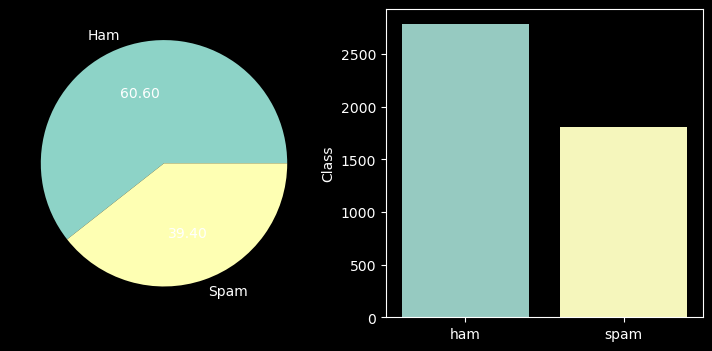

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['Class'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.show()
plt.savefig('Ham_Spam.png',format='png',bbox_inches = "tight")

In [80]:
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in df[df['Class'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

KeyError: 'text'

#### Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. Feel free to create separate training and testing data files. 
#### Have your own strategy to deal with any missing feature values (e.g., remove instances with missing features or fill in the missing feature values with the most popular value.).

In [68]:
# Creatae the Test and Train Data using basic python sysntex 
train_df = df.iloc[:1000,:]
test_df = df.iloc[1000:,:]

X_train = train_df.drop(columns='Class')
Y_train = train_df['Class']
X_test = test_df.drop(columns='Class')
Y_test = test_df['Class']
print("Total Train Data", train_df.shape,'\nTotal Test Data',test_df.shape,"\nTest Data set x:",X_test.shape,'\nTest Data set y:',Y_test.shape,'\nTrain Data set x:',X_train.shape,'\nTrain data set y:',Y_train.shape)

Total Train Data (1000, 58) 
Total Test Data (3601, 58) 
Test Data set x: (3601, 57) 
Test Data set y: (3601,) 
Train Data set x: (1000, 57) 
Train data set y: (1000,)


In [69]:
# Creatae the Test and Train Data using model selection
#--------------------------------
from sklearn.model_selection import train_test_split
#--------------------------------
X = df.drop(columns='Class')
y = df['Class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.782)
print("Total Data", df.shape,"\nTest Data set x:",x_test.shape,'\nTest Data set y:',y_test.shape,'\nTrain Data set x:',x_train.shape,'\nTrain data set y:',y_train.shape)

Total Data (4601, 58) 
Test Data set x: (3598, 57) 
Test Data set y: (3598,) 
Train Data set x: (1003, 57) 
Train data set y: (1003,)


In [70]:
# Decision Tree classifier
#--------------------------
from sklearn.tree import DecisionTreeClassifier
#--------------------------

# Fit the training model to the desired classifier
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf = decision_tree_clf.fit(x_train, y_train)
dt_accuracy = decision_tree_clf.score(x_test, y_test)
print("Classification Accuracy: ", round((dt_accuracy),4), "\n")

Classification Accuracy:  0.8763 



Decision Tree classifier

Prediction: ['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham'] 

Accuracy: 0.8763 

Report: 
               precision    recall  f1-score   support

         ham       0.89      0.91      0.90      2198
        spam       0.85      0.82      0.84      1400

    accuracy                           0.88      3598
   macro avg       0.87      0.87      0.87      3598
weighted avg       0.88      0.88      0.88      3598

Confusion Matrix: 
 [[2001  197]
 [ 248 1152]] 



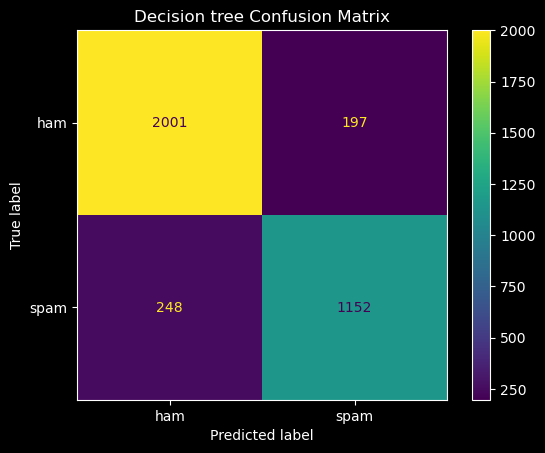

In [71]:
# Metrics - Decision Tree classifier
dt_predict = decision_tree_clf.predict(x_test)
print("Decision Tree classifier\n")
print ("Prediction:",dt_predict,'\n')
print("Accuracy:", round((accuracy_score(y_test, dt_predict)),4), "\n")
print("Report: \n", classification_report(y_test, dt_predict)) 
print("Confusion Matrix: \n", confusion_matrix(y_test, dt_predict), "\n")
plot_confusion_matrix(decision_tree_clf, x_test, y_test)
plt.title("Decision tree Confusion Matrix")
plt.savefig('DC_CM.png',format='png',bbox_inches = "tight")

In [72]:
n_nodes = decision_tree_clf.tree_.node_count
children_left = decision_tree_clf.tree_.children_left
children_right = decision_tree_clf.tree_.children_right
feature = decision_tree_clf.tree_.feature
threshold = decision_tree_clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 163 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 51] <= 0.05599999986588955 else to node 82.
	node=1 is a split node: go to node 2 if X[:, 52] <= 0.0820000022649765 else to node 71.
		node=2 is a split node: go to node 3 if X[:, 15] <= 0.10500000044703484 else to node 56.
			node=3 is a split node: go to node 4 if X[:, 22] <= 0.22500000149011612 else to node 53.
				node=4 is a split node: go to node 5 if X[:, 5] <= 0.8300000131130219 else to node 50.
					node=5 is a split node: go to node 6 if X[:, 6] <= 0.5399999916553497 else to node 47.
						node=6 is a split node: go to node 7 if X[:, 23] <= 11.125 else to node 46.
							node=7 is a split node: go to node 8 if X[:, 56] <= 6212.5 else to node 45.
								node=8 is a split node: go to node 9 if X[:, 4] <= 7.414999961853027 else to node 44.
									node=9 is a split node: go to node 10 if X[:, 7] <= 1.074999988079071 else to node 41.
										node=10 is a

In [73]:
#plt.figure(figsize=(25,25))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=2000)
tree.plot_tree(decision_tree_clf, filled=True)
plt.title("Decision tree")
plt.show()
plt.savefig('Dtree.jpg',format='jpg')
plt.savefig('filename.png')

<Figure size 640x480 with 0 Axes>

#### 1. Compare the accuracies of the Random Forest classifier as a function of the number of base learners (e.g., 10, 50, 100, 500, 1000, and 500) and the number of features to consider at each split (e.g., auto or sqrt). Report your observations/conclusions and provide evidence to support your conclusions. [50 points]

In [74]:
# Random Forest classifier
#--------------------------
from sklearn.ensemble import RandomForestClassifier
#--------------------------

estimator = [10,50,100,500,1000,5000] #estimate values
features = ['auto', 'sqrt'] #feature values
rf_accuracy_auto = [] # Empty array to store the Accuracy score
rf_accuracy_sqrt = []
print('Random Forest Classification model','\n')
for i in features: #for loop for feature selection
    print('Random Forest model with Feature:',i,'\n')
    for j in estimator: #for loop for estimator selection
        random_forest_clf = RandomForestClassifier(n_estimators=j, max_features=i) #create a RF model with feature and estimator
        random_forest_clf = random_forest_clf.fit(X_train, Y_train) #Train the model
        rf_score = random_forest_clf.score(X_test, Y_test) # Test the model and get the accuracy score
        print('Classification Accuracy with ',j,' estimators:', round((rf_score),4), "\n")
        if i == 'sqrt':
            rf_accuracy_sqrt.append(rf_score) #store the accuracy score if feature is squrt
        else:
            rf_accuracy_auto.append(rf_score) #store the accuracy score if feature is auto

accuracy1 = pd.DataFrame(rf_accuracy_sqrt,columns = ['accuracy_sqrt'])
accuracy2 = pd.DataFrame(rf_accuracy_auto,columns = ['accuracy_auto'])
accuracy = pd.merge(accuracy1,accuracy2,left_index=True,right_index=True)
print (accuracy)

Random Forest Classification model 

Random Forest model with Feature: auto 

Classification Accuracy with  10  estimators: 0.9159 

Classification Accuracy with  50  estimators: 0.9328 

Classification Accuracy with  100  estimators: 0.932 

Classification Accuracy with  500  estimators: 0.9331 

Classification Accuracy with  1000  estimators: 0.9356 

Classification Accuracy with  5000  estimators: 0.9336 

Random Forest model with Feature: sqrt 

Classification Accuracy with  10  estimators: 0.9203 

Classification Accuracy with  50  estimators: 0.9306 

Classification Accuracy with  100  estimators: 0.9325 

Classification Accuracy with  500  estimators: 0.9331 

Classification Accuracy with  1000  estimators: 0.9334 

Classification Accuracy with  5000  estimators: 0.9339 

   accuracy_sqrt  accuracy_auto
0       0.920300       0.915857
1       0.930575       0.932796
2       0.932519       0.931963
3       0.933074       0.933074
4       0.933352       0.935573
5       0.933907  

In [75]:
accuracy.describe()

accuracy_sqrt  accuracy_auto
count       6.000000       6.000000
mean        0.930621       0.930482
std         0.005185       0.007266
min         0.920300       0.915857
25%         0.931061       0.932172
50%         0.932796       0.932935
75%         0.933282       0.933491
max         0.933907       0.935573

Random Forest classifier with SQRT and 5000  estimators

Prediction: ['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam'] 

Accuracy: 0.9339 

Report: 
               precision    recall  f1-score   support

         ham       0.93      0.96      0.95      2182
        spam       0.94      0.89      0.91      1419

    accuracy                           0.93      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Confusion Matrix: 
 [[2096   86]
 [ 152 1267]] 



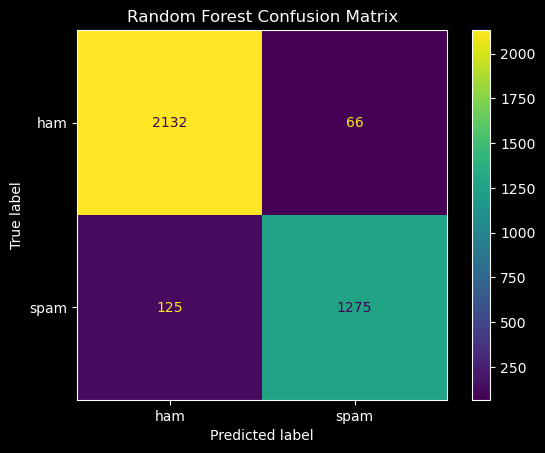

In [78]:
# Metrics - Random Forest classifier 
rf_predict = random_forest_clf.predict(X_test)

print("Random Forest classifier with SQRT and 5000  estimators\n")
print ("Prediction:",rf_predict,'\n')
print("Accuracy:", round((accuracy_score(Y_test, rf_predict)),4), "\n")
print("Report: \n", classification_report(Y_test, rf_predict)) 
print("Confusion Matrix: \n", confusion_matrix(Y_test, rf_predict), "\n")
plot_confusion_matrix(random_forest_clf, x_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.savefig('RF_CM.png',format='png',bbox_inches = "tight")

In [77]:
fn=X_train.columns
cn= 'class'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=2000)
tree.plot_tree(random_forest_clf.estimators_[50],
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.title("Random Forest Tree")
plt.savefig('RFtree.png',format='png',bbox_inches = "tight")